# Handwritten Digit Classification using a simple Neural n/w

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(f"Length of X_train: {len(X_train)}")
print(f"Length of X_test: {len(X_test)}")

Length of X_train: 60000
Length of X_test: 10000


In [5]:
print(f"Shape of a Sample in X_train: {X_train[0].shape}")

Shape of a Sample in X_train: (28, 28)


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

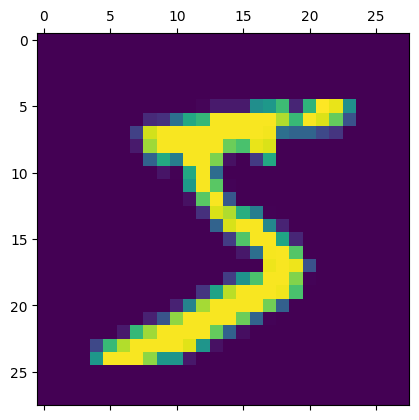

In [7]:
plt.matshow(X_train[0])

In [8]:
print(f"Checking the output: {y_train[0]}")
print(f"First 10 outputs: {y_train[:10]}")

Checking the output: 5
First 10 outputs: [5 0 4 1 9 2 1 3 1 4]


## Manual Scaling

In [9]:
X_train = X_train / 255
X_test = X_test / 255

X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Flattening the dataset

In [10]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print(f"Shape of X_train_flattened: {X_train_flattened.shape}")
print(f"Shape of X_test_flattened: {X_test_flattened.shape}")

Shape of X_train: (60000, 28, 28)
Shape of X_test: (10000, 28, 28)
Shape of X_train_flattened: (60000, 784)
Shape of X_test_flattened: (10000, 784)


In [11]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

2D array -> 1D array, successfully converted.

## Creating a simple Neural n/w

w/o a hidden layer

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid') # 10 neurons in output layer
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8156 - loss: 0.7173
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 983us/step - accuracy: 0.9140 - loss: 0.3057
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.9203 - loss: 0.2888
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.9240 - loss: 0.2720
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9265 - loss: 0.2644


Sequential -> i'm having a stack of layers in my neural n/w.

Dense -> every neuron in i/p layer is connected to every other neuron in the next layer.

Optimizers -> allow us to train efficiently, while backward propagation & training is going on optimizer will allow us to reach to global optima in an efficient way.

Loss func. -> just like MSE loss function in linear regression.

"sparse_categorical_crossentropy" => o/p class -> categorical, & sparse i.e. o/p variable -> is an integer (a one hot encoded array).

Metrics -> what my goal is, "['accuracy']" -> my goal is to achieve accuracy.

'epochs' -> no. of iterations for which the neural n/w will run the training.

In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.9166 - loss: 0.2987


[0.26632916927337646, 0.9269000291824341]

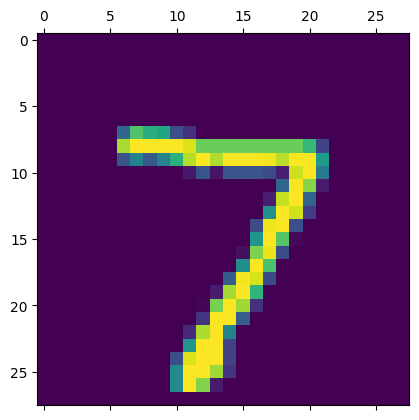

In [14]:
plt.matshow(X_test[0])

In [15]:
y_pred = model.predict(X_test_flattened)
y_pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step


array([2.1486685e-02, 1.9085745e-07, 5.4411031e-02, 9.5062363e-01,
       2.2511240e-03, 1.4673337e-01, 9.6207395e-07, 9.9971092e-01,
       8.2704976e-02, 6.4318061e-01], dtype=float32)

In [16]:
np.argmax(y_pred[0])

7

"np.argmax" -> finds a maximum element from an array and returns the index of it.

## Confusion Matrix

In [17]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [18]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    6,    6,    2,    3,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   4,    7,  927,   14,   10,    3,   11,   10,   43,    3],
       [   3,    0,   19,  909,    1,   27,    2,    9,   32,    8],
       [   1,    1,    4,    1,  921,    0,    9,    3,   11,   31],
       [   9,    2,    3,   23,   10,  785,   12,    4,   38,    6],
       [  11,    3,    9,    0,    8,   12,  906,    2,    7,    0],
       [   1,    5,   24,    6,    9,    1,    0,  943,    4,   35],
       [   4,    4,    6,   14,    9,   22,    5,    7,  897,    6],
       [  10,    5,    1,    9,   31,    7,    0,   17,   14,  915]])>

Text(95.72222222222221, 0.5, 'Truth')

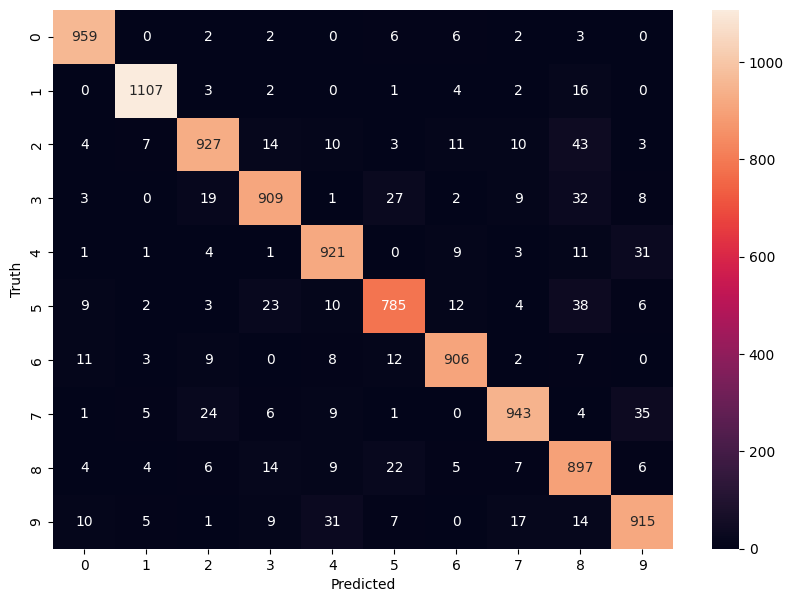

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Neural n/w with a Hidden Layer

In [20]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # 100 neurons in hidden layer
    keras.layers.Dense(10, activation='sigmoid') # 10 neurons in output layer
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8663 - loss: 0.4693
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9608 - loss: 0.1338
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9746 - loss: 0.0877
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9798 - loss: 0.0658
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9847 - loss: 0.0498


In [21]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.1016


[0.08777763694524765, 0.9731000065803528]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


Text(95.72222222222221, 0.5, 'Truth')

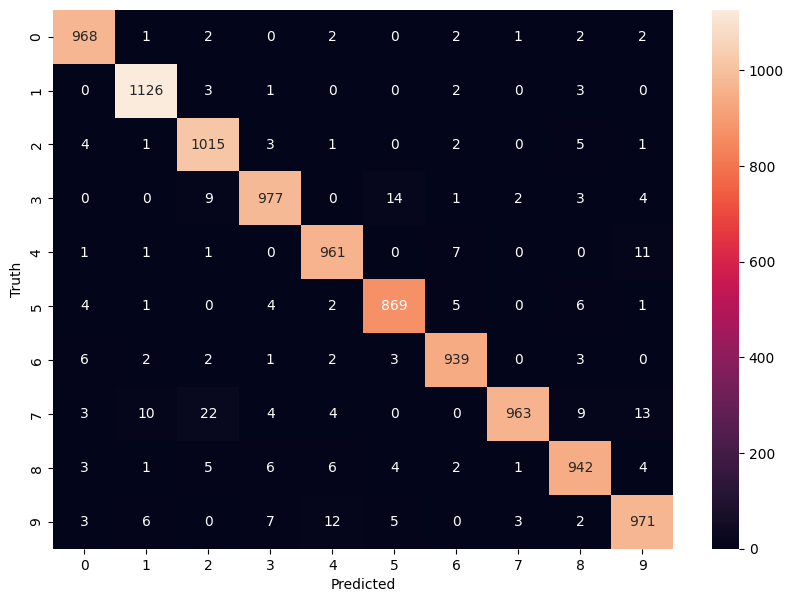

In [22]:
y_pred = model.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Utilizing keras's flattened array function

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # 28*28 = 784
    # Used for making a 2D array of 28x28 pixels into a 1D array of 784 pixels.
    
    keras.layers.Dense(100, activation='relu'), # 100 neurons in hidden layer
    keras.layers.Dense(10, activation='sigmoid') # 10 neurons in output layer
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=5)

print("********************************************************************")
print(f"Accuracy of model w.r.t test data: {model.evaluate(X_test, y_test)}")

c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8753 - loss: 0.4436
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9638 - loss: 0.1258
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9758 - loss: 0.0841
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9807 - loss: 0.0632
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9860 - loss: 0.0477
********************************************************************
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9713 - loss: 0.0899
Accuracy of model w.r.t test data: [0.07682737708091736, 0.9760000109672546]


## Trying out different optimizers, loss functions, activation functions, & epochs to see if I can get a better accuracy.

In [24]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import RandomizedSearchCV

In [25]:
# Custom Wrapper Class
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    
    def __init__(
            self, 
            optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            activation='relu', 
            epochs=5, 
            batch_size=32
        ):
        self.optimizer = optimizer
        self.loss = loss
        self.activation = activation
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None  # Placeholder for the model
    
    def build_model(self):
        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28, 28)),
            keras.layers.Dense(100, activation=self.activation),
            keras.layers.Dense(10, activation='sigmoid')
        ])
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model_ = self.build_model()
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def score(self, X, y):
        _, accuracy = self.model_.evaluate(X, y, verbose=0)
        return accuracy

    def predict(self, X):
        return np.argmax(self.model_.predict(X), axis=-1)

In [26]:
# Define the parameter grid
param_dist = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'loss': ['sparse_categorical_crossentropy'],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'epochs': [5, 10],
    'batch_size': [32, 64, 128]
}

In [27]:
# Create the wrapper instance
model = KerasClassifierWrapper()

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(
        estimator=model, 
        param_distributions=param_dist, 
        n_iter=10, 
        cv=3, 
        verbose=2, 
        n_jobs=-1
    )

random_search_result = random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# Print the best score and parameters
print(f"Best Accuracy: {random_search_result.best_score_}")
print(f"Best Parameters: {random_search_result.best_params_}")

Best Accuracy: 0.9711166818936666
Best Parameters: {'optimizer': 'adam', 'loss': 'sparse_categorical_crossentropy', 'epochs': 10, 'batch_size': 64, 'activation': 'relu'}


## Result:

Best Accuracy: 0.9711166818936666

Best Parameters: {'optimizer': 'adam', 'loss': 'sparse_categorical_crossentropy', 'epochs': 10, 'batch_size': 64, 'activation': 'relu'}

In [29]:
# Evaluate the best model on the test data
best_model = random_search_result.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9750000238418579


## Result:

Test Accuracy: 0.9750000238418579